<a href="https://colab.research.google.com/github/SandhyaKshirsagar/Timeseries/blob/main/covid_cases_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Given the past data, future prediction of covid patients

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TIme Series/DAy 4/covid_wikipedia_tables.csv')

In [3]:
df.shape

(258, 64)

In [4]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,Date,West,Midwest,South,Northeast,Territories,Date,Confirmed,Deaths,Recovered,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,AZ,CA,CO,HI,ID,MT,NM,NV,OR,...,VI,New,Cml,New,Cml,New,Cml,Cml,NaN,NaN
2,Jan 21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Jan 21,1,1,NaN,NaN,NaN,NaN,1
3,Jan 24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Jan 24,1,2,NaN,NaN,NaN,NaN,2
4,Jan 25,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Jan 25,1,3,NaN,NaN,NaN,NaN,3
5,Jan 26,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Jan 26,2,5,NaN,NaN,NaN,NaN,5
6,Jan 30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Jan 30,1,6,NaN,NaN,NaN,NaN,6
7,Jan 31,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Jan 31,1,7,NaN,NaN,NaN,NaN,7
8,Feb 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Feb 1,1,8,NaN,NaN,NaN,NaN,8
9,Feb 2,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Feb 2,3,11,NaN,NaN,NaN,NaN,11


## Clean and organize the table

In [5]:
## df contains both tables, the first table contains cases
cases = df.copy()

## drop the first row filled with misplaced headers
cases.drop(0, axis=0, inplace=True)

## drop the extra date column
cases.drop('56', axis=1, inplace=True)

## set up the proper column names
col_names = ['Date']
col_names = col_names + list(cases.loc[1])
col_names = [x for x in col_names if str(x) != 'nan']

col_names[56] = 'Confirmed New'
col_names[57] = 'Confirmed Cml'
col_names[58] = 'Deaths New'
col_names[59] = 'Deaths Cml'
col_names[60] = 'Recovered New'
col_names[61] = 'Recovered Cml'
last_col = ['Active Cml']
col_names = col_names + last_col

cases.columns = col_names

## drop rows with extra column headers
rows_to_drop = [1,18,19,51,52,83,84,116,117,148,149,181,182,214,215,246,247,251,252,253,254,255,256,257]

for row in rows_to_drop:
    cases.drop(row, axis=0, inplace=True)

## fill nans with 0
cases.fillna(0, inplace=True)

## convert dates from string to datetime
import datetime as dt

cases['Date'] = [dt.datetime.strptime(d + ' 2020', '%b %d %Y') for d in cases['Date']]

cases.reset_index(drop=True, inplace=True)

cases.set_index('Date', inplace=True)

cases=cases.astype(float)

print(len(cases))

233


In [6]:
cases.head()

,AK,AZ,CA,CO,HI,ID,MT,NM,NV,OR,...,MP,PR,VI,Confirmed New,Confirmed Cml,Deaths New,Deaths Cml,Recovered New,Recovered Cml,Active Cml
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0
2020-01-25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0
2020-01-26,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,5.0
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,6.0


## Plot Daily Cases and 7-day rolling mean

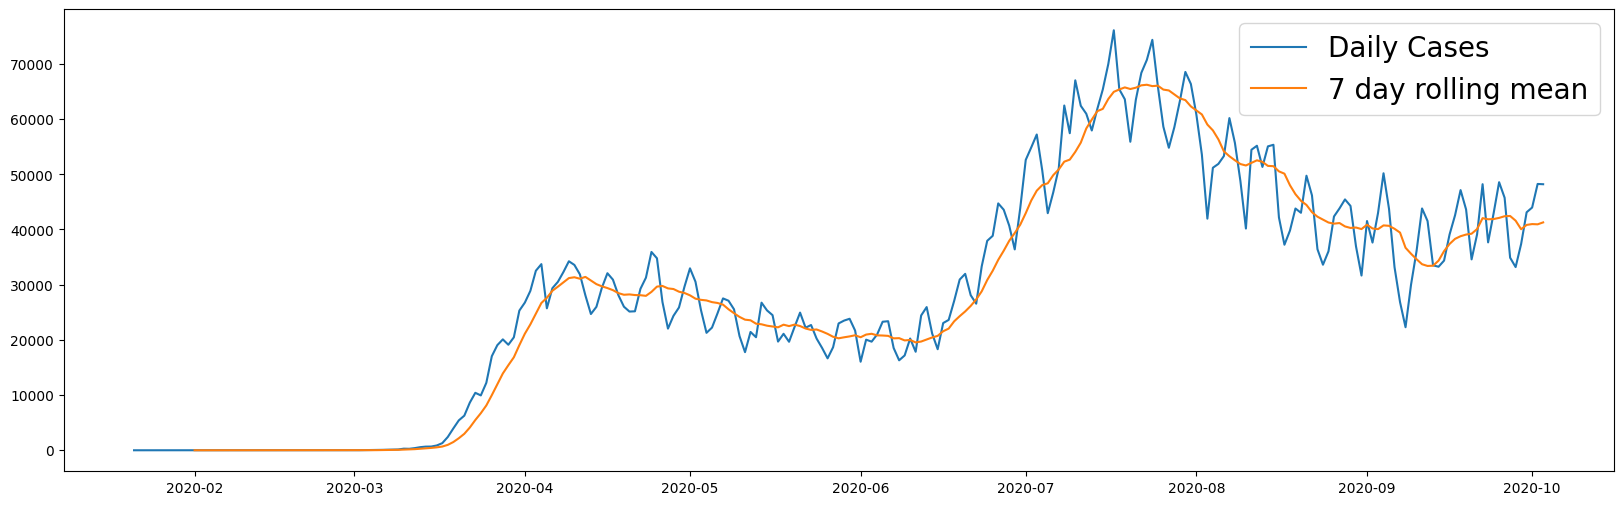

In [7]:
plt.figure(figsize=(20,6))
plt.plot(cases.index.values, cases['Confirmed New'], label = 'Daily Cases')
plt.plot(cases.index.values, cases['Confirmed New'].rolling(7).mean(), label = '7 day rolling mean')
plt.legend(prop={'size': 20})
plt.show()

## Plot Autocorrelation and Partial autocorrelation on a range of lag times

In [8]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

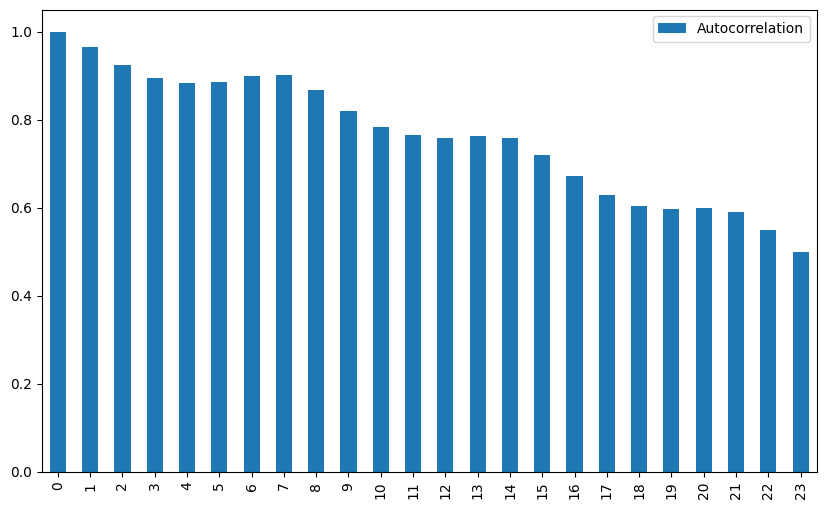

In [9]:
acf_1 = acf(cases['Confirmed New'])
acf_df = pd.DataFrame([acf_1]).T
acf_df.columns = ['Autocorrelation']
acf_df.plot(kind='bar', figsize=(10,6))
plt.show()
# acf_df

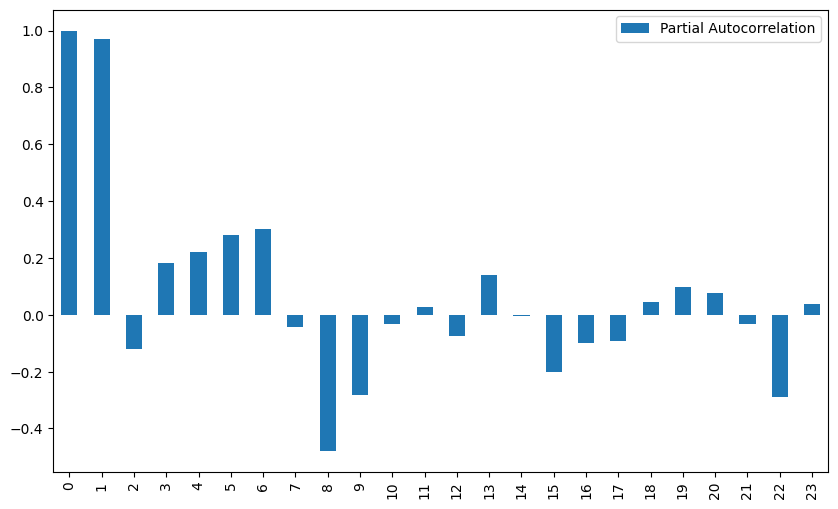

In [10]:
pacf_1 = pacf(cases['Confirmed New'])
pacf_df = pd.DataFrame([pacf_1]).T
pacf_df.columns = ['Partial Autocorrelation']
pacf_df.plot(kind='bar', figsize=(10,6))
plt.show()

## Hyperparameter fitting for ARIMA model

In [11]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [12]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    rmse = np.sqrt(mse)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
hyper_fitting = cases

p_values = [5, 6, 7, 8, 9, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(hyper_fitting['Confirmed New'].values, p_values, d_values, q_values)

ARIMA(5, 0, 0) RMSE=5596.708
ARIMA(5, 0, 1) RMSE=5448.589
ARIMA(5, 0, 2) RMSE=5260.088
ARIMA(5, 1, 0) RMSE=5166.242
ARIMA(5, 1, 1) RMSE=5186.269
ARIMA(5, 1, 2) RMSE=4728.100
ARIMA(5, 2, 0) RMSE=6641.659
ARIMA(5, 2, 1) RMSE=5115.582
ARIMA(5, 2, 2) RMSE=5036.013
ARIMA(6, 0, 0) RMSE=5156.142
ARIMA(6, 0, 1) RMSE=5199.291
ARIMA(6, 0, 2) RMSE=4820.270
ARIMA(6, 1, 0) RMSE=5288.576
ARIMA(6, 1, 2) RMSE=4593.887
ARIMA(6, 2, 0) RMSE=5048.262
ARIMA(6, 2, 1) RMSE=4621.118
ARIMA(6, 2, 2) RMSE=4642.261
ARIMA(7, 0, 0) RMSE=5279.061
ARIMA(7, 0, 1) RMSE=5028.968
ARIMA(7, 0, 2) RMSE=4764.194
ARIMA(7, 1, 0) RMSE=4747.516
ARIMA(7, 1, 1) RMSE=4522.360
ARIMA(7, 1, 2) RMSE=4535.617
ARIMA(7, 2, 0) RMSE=4649.131
ARIMA(7, 2, 1) RMSE=4620.733
ARIMA(7, 2, 2) RMSE=4653.464
ARIMA(8, 0, 0) RMSE=4743.891
ARIMA(8, 0, 1) RMSE=4503.628
ARIMA(8, 0, 2) RMSE=4468.799
ARIMA(8, 1, 0) RMSE=4508.922
ARIMA(8, 1, 1) RMSE=4497.426
ARIMA(8, 1, 2) RMSE=4570.308
ARIMA(8, 2, 0) RMSE=4631.425
ARIMA(8, 2, 1) RMSE=4548.593


## Train/Test splits and Plots

In [ ]:
X = cases['Confirmed New'].values
print(len(X))
# train_size = int(len(X) * 0.7)
train_size = len(X)-60
train, test = X[0:train_size], X[train_size:]
train_time, test_time = cases.index[0:train_size], cases.index[train_size:]
history = [x for x in train]
# make predictions
predictions = list()
# for t in range(len(test)):

model = ARIMA(history, order=(9,0,0))
model_fit = model.fit()
yhats = model_fit.forecast(steps=len(test))

233


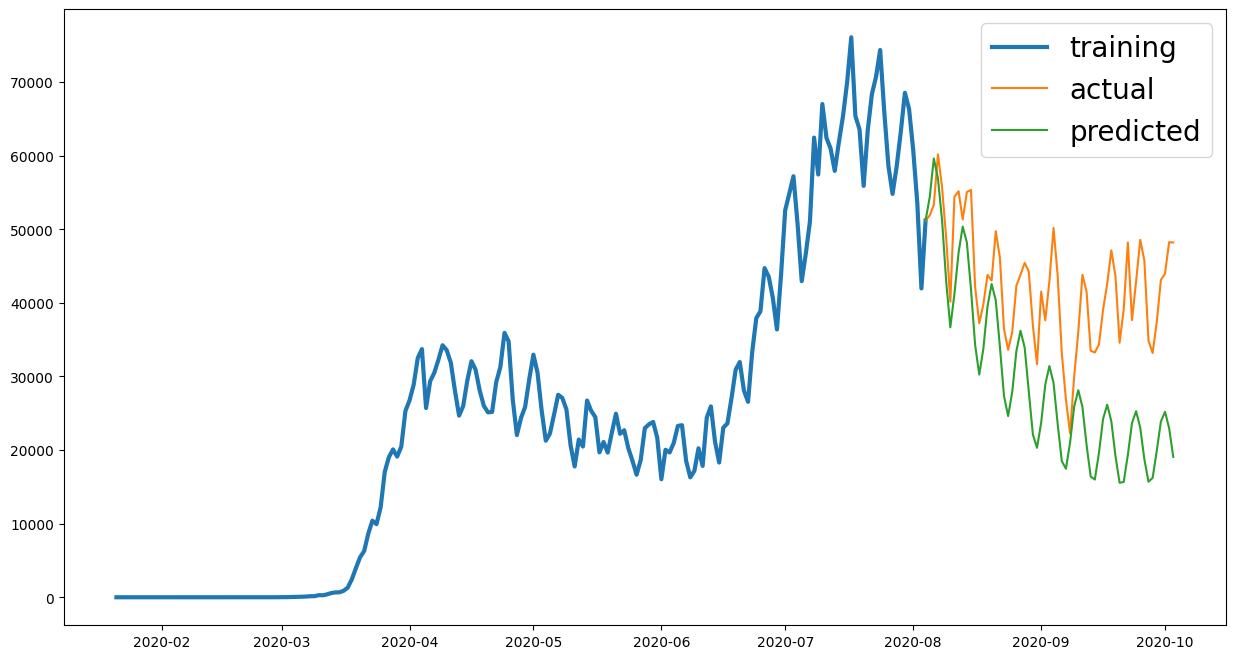

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))

plt.plot(train_time, train, label='training', linewidth=3)

plt.plot(np.insert(test_time,0,train_time[-1]), np.insert(test,0,train[-1]), label='actual')
plt.plot(np.insert(test_time,0,train_time[-1]), np.insert(yhats,0,train[-1]), label='predicted')
plt.legend(prop={'size': 20})

In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def pred_and_plot(days):
    X = cases['Confirmed New'].values

    train_size = len(X)-days
    train, test = X[0:train_size], X[train_size:]
    train_time, test_time = cases.index[0:train_size], cases.index[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    # for t in range(len(test)):

    model = ARIMA(history, order=(9,0,0))
    model_fit = model.fit()
    yhats = model_fit.forecast(steps=len(test))

    print('Number of Days predicted: %s' % days)

    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(15,8))

    plt.plot(train_time, train, label='training', linewidth=3)

    plt.plot(np.insert(test_time,0,train_time[-1]), np.insert(test,0,train[-1]), label='actual')
    plt.plot(np.insert(test_time,0,train_time[-1]), np.insert(yhats,0,train[-1]), label='predicted')


    plt.legend(prop={'size': 20})

    rmse = np.sqrt(mean_squared_error(test, yhats))
    print('RMSE=%.3f' % rmse)

    plt.show()

    return rmse

Number of Days predicted: 5
RMSE=6231.305


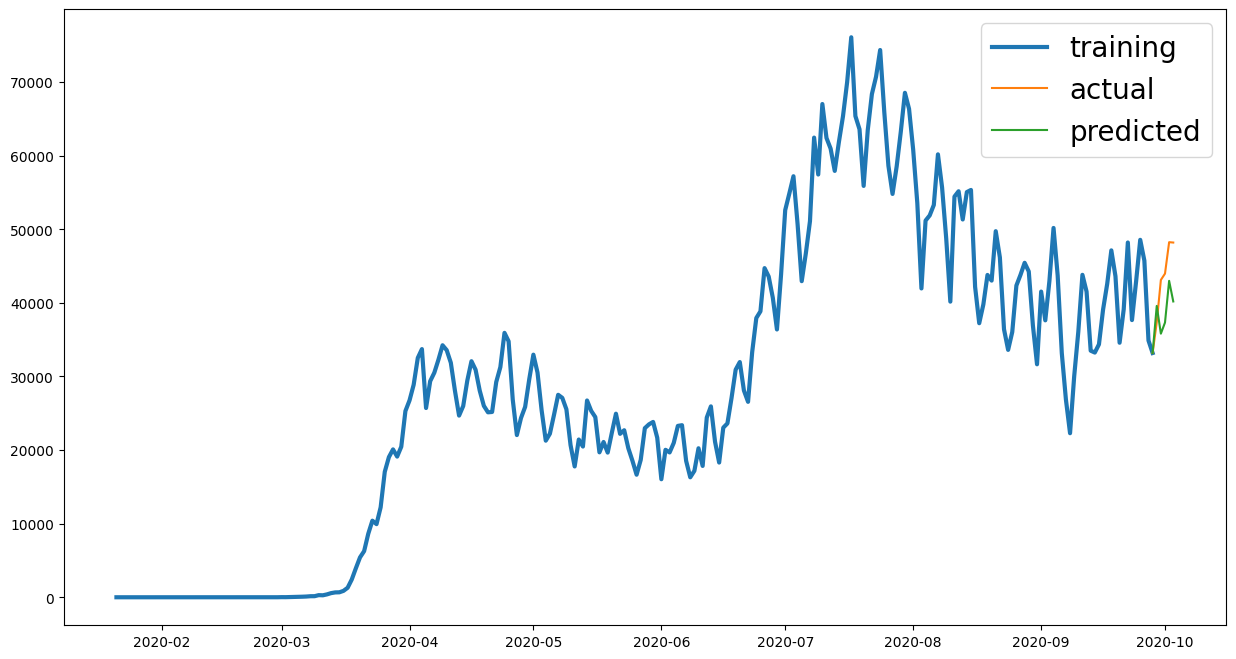

Number of Days predicted: 10
RMSE=4298.347


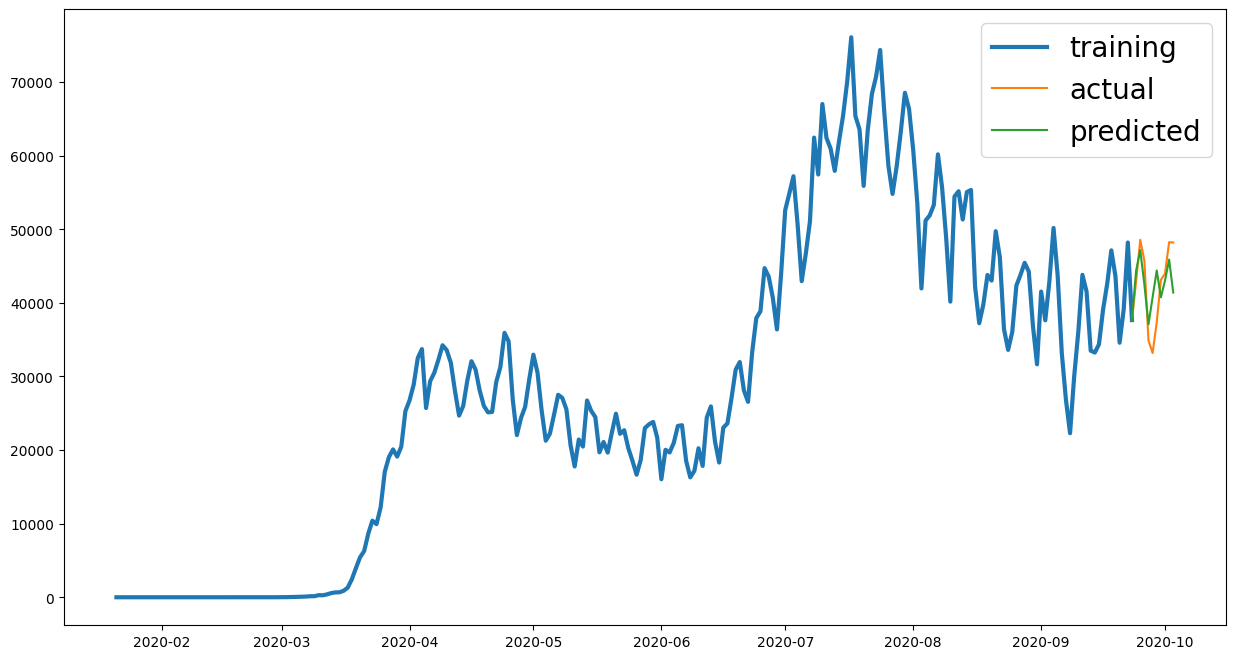

Number of Days predicted: 20
RMSE=10490.762


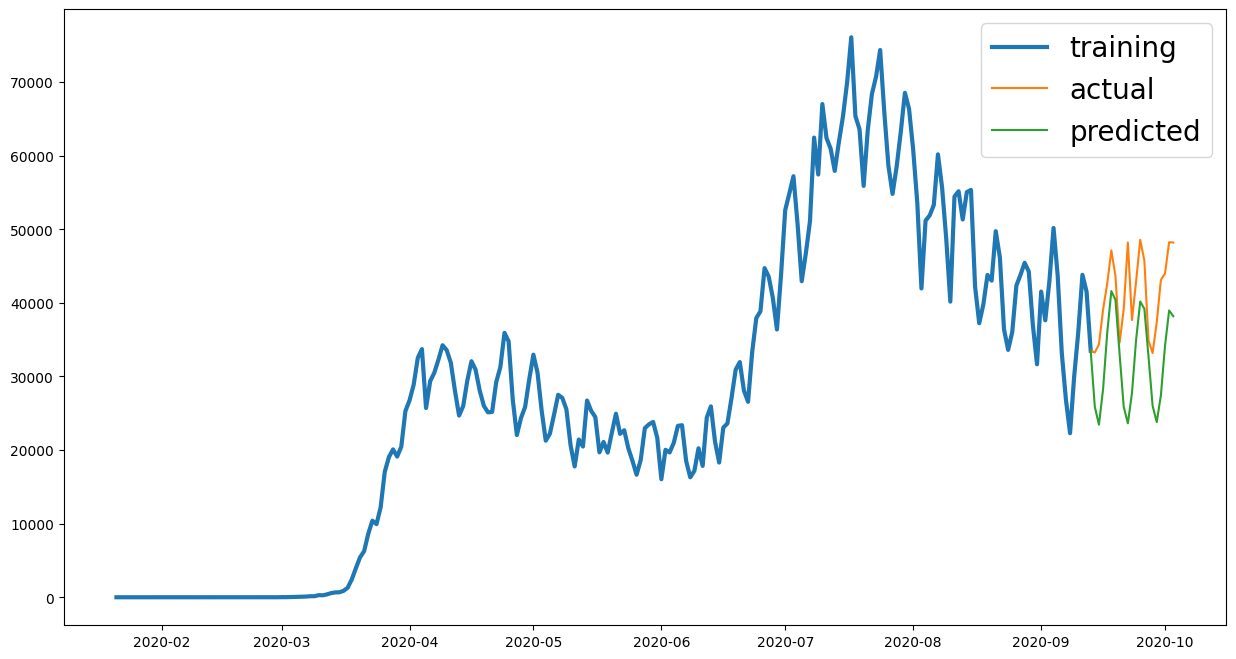

Number of Days predicted: 30
RMSE=7541.562


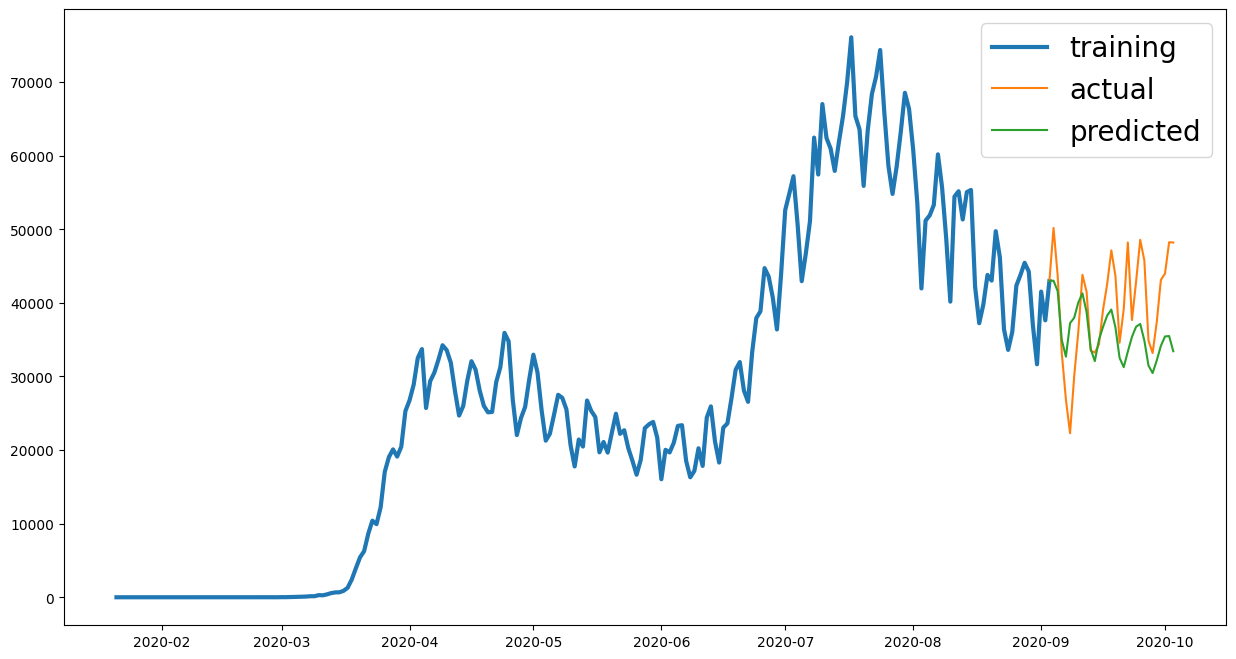

Number of Days predicted: 60
RMSE=15201.898


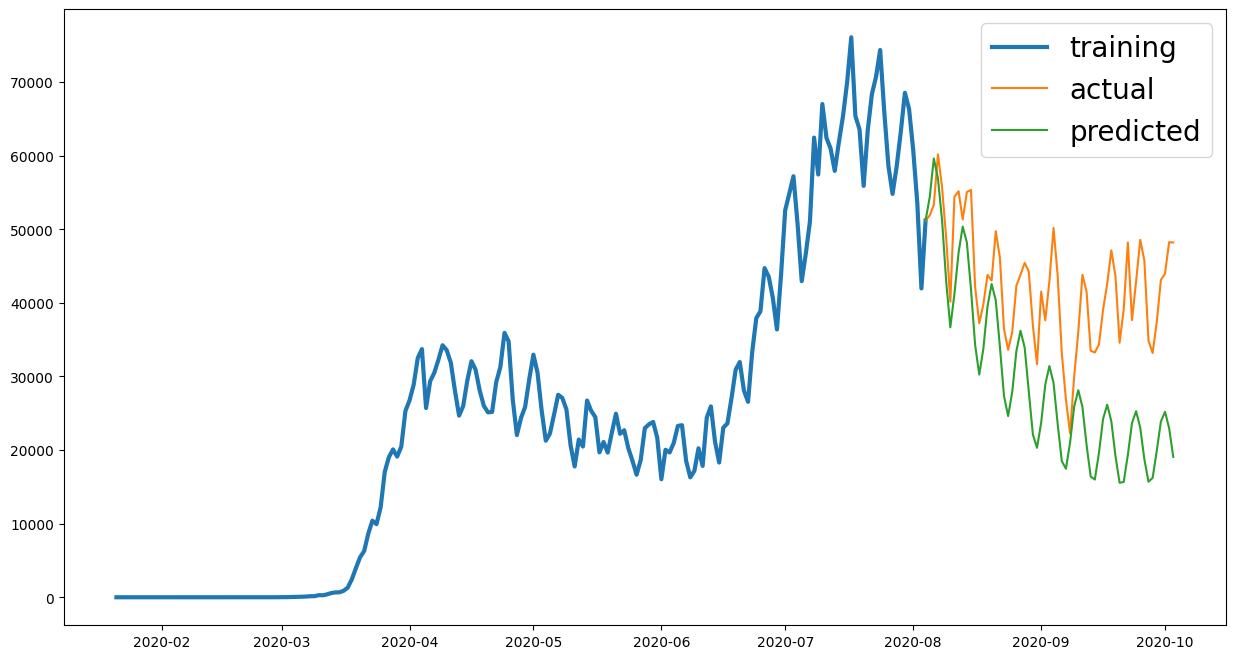

Number of Days predicted: 100
RMSE=25574.826


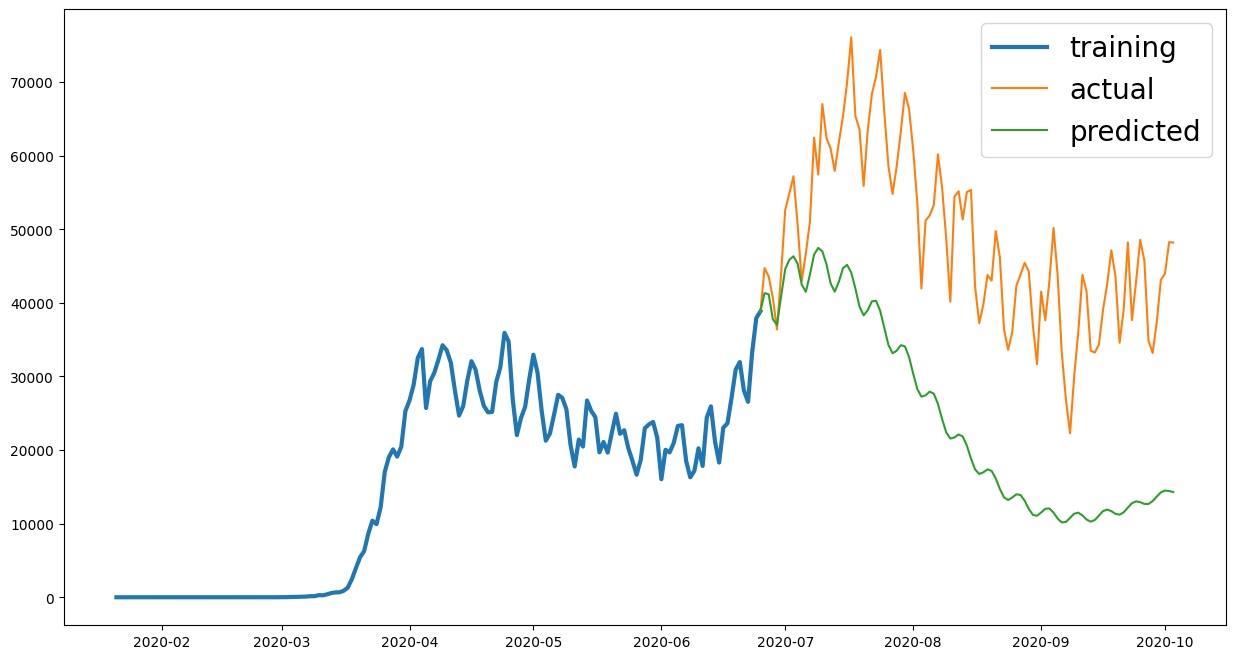

In [ ]:
num_days_predicted = [5,10,20,30,60,100]
rmse_plain = []

for days in num_days_predicted:
    rmse = pred_and_plot(days)
    rmse_plain.append(rmse)
